# Wizualizacja orginalna
![](wine.jfif)

Został on wzięty z [twitera](https://twitter.com/EU_Eurostat/status/1329378890431614976/photo/1) Eurostatu. Do mojej poprawionej wizualizacji użyłem danych z tego [linku](https://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-066341_QID_-6082FCC0_UID_-3F171EB0&layout=PRCCODE,B,X,0;DECL,L,Y,0;INDICATORS,C,Y,1;PERIOD,L,Z,0;&zSelection=DS-066341PERIOD,201952;&rankName1=PERIOD_1_0_-1_2&rankName2=PRCCODE_1_0_0_0&rankName3=DECL_1_2_0_1&rankName4=INDICATORS_1_0_1_1&sortC=ASC_-1_FIRST&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=true&lang=EN&cfo=%23%23%23%2C%23%23%23.%23%23%23) (niedokładnie z tego tylko zmieniałem modyfikatory, aby uzyskać więcej lat) po uwcześniejszym sprawdzeniu, czy dane dla krajów są podane w litrach. Jeśli danych nie było to zamieniłem je na zero w csv'ce.
# Wykres poprawiony

In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


#Wczytanie danych
wines = pd.read_csv("wine_data2.csv", encoding = "ISO-8859-1")

# opcje wyswietlania
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("darkgrid")

#Przygotowanie danych
def convert_to_int(val):
    new_val = val.replace(' ','')
    return int(new_val)

wines['Value'] = wines['Value'].apply(convert_to_int)
wines['Value'] = wines['Value'].apply(lambda x: x/1e9)
wines = wines[['DECL','PERIOD','Value']].groupby(['DECL', 'PERIOD']).sum()
totals =  wines.loc["EU27TOTALS_2020"] # zapisane sum
top =  wines.copy().loc[["Hungary", "Germany", "Portugal", "France", "Spain", "Italy"]]
top['Percentage'] = top['Value']/totals['Value'] * 100
#mamy procenty na rok dla ostatnich pięciu lat

## Pierwsza propozycja

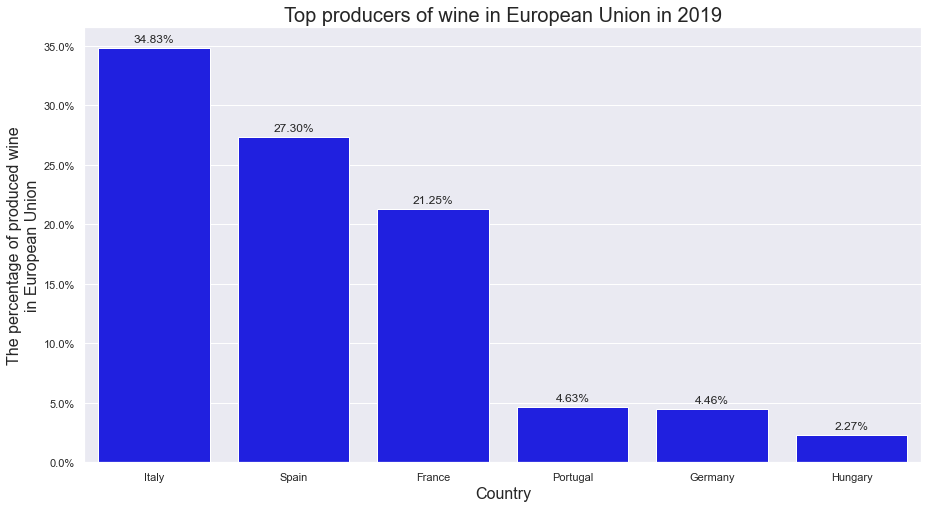

In [188]:
#Wizualizacja
aktualne = top.reset_index()
aktualne = aktualne.loc[aktualne["PERIOD"] == "Jan.-Dec. 2019"]
aktualne.sort_values('Percentage', ascending = False, inplace = True)

bars = sns.barplot(data = aktualne, x= 'DECL', y = 'Percentage', color ="Blue")
plt.title('Top producers of wine in European Union in 2019', fontsize = 20)
plt.ylabel('The percentage of produced wine\nin European Union', fontsize = 16)
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.xlabel('Country', fontsize = 16)
for p in bars.patches:
    height = p.get_height()
    bars.text(p.get_x()+p.get_width()/2.,
            height + 0.5,
            '{:1.2f}%'.format(height),
            ha="center") 
plt.show()

Moim zdaniem dane tylko za 2019 rok dają nam strasznie mało kontekstu, jeśli nie znamy się na rynkach win. Dlatego zaproponuje drugą propozycję, która jednak będzie korzystała z większej ilości danych.

## Druga propozycja

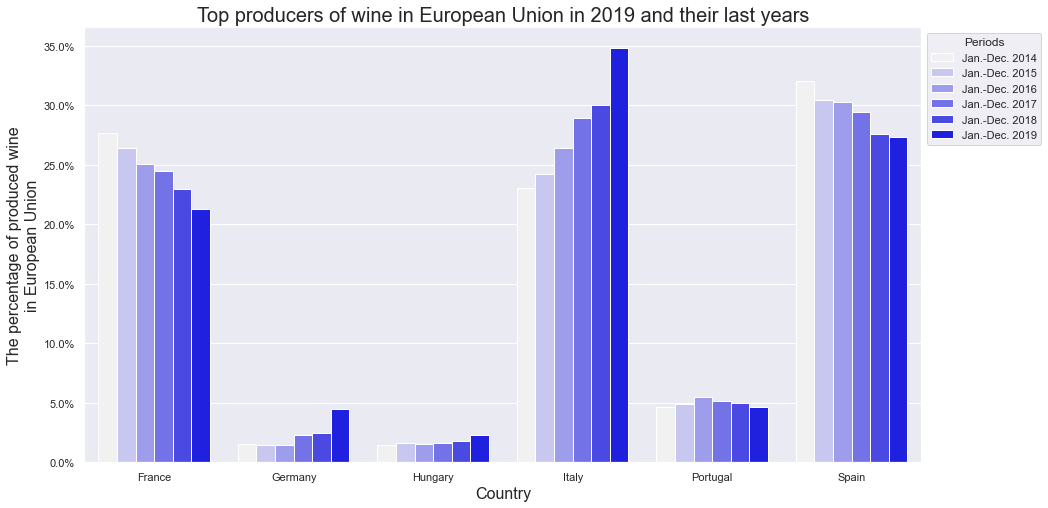

In [192]:
bars = sns.barplot(data = top.reset_index(), x= 'DECL', y = 'Percentage', hue = "PERIOD", color ="Blue")
plt.title('Top producers of wine in European Union in 2019 and their last years', fontsize = 20)
plt.ylabel('The percentage of produced wine\nin European Union', fontsize = 16)
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.xlabel('Country', fontsize = 16)
plt.legend(bbox_to_anchor=(1, 1), title = "Periods")
plt.show()

# Uzasadnienie
Uważam, że mój pierwszy wykres jest lepszy od pierwotnej wizualizacji, ponieważ
* dane liczbowe w miliardach litrów są niezrozumiałe dla odbiorcy, lepiej zamiast tego jest użyć procentów, które jest nam sobie łatwiej wyobrazić,
* porównywanie długości pasków jest znacznie łatwiejsze niz pól wina w kieliszku,
* podanie dokładniejszych procentów sprawia, że nie ma takiej sytuacji jak z Portugalią i Niemcami, gdzie mamy podany tą samą ilość wyprodukowanego wina, ale za to inny procent
* zamiast stawiania butelki obok dla porównania użyłem po prostu procentów.

Drugi wykres umieściłem dlatego, że dla mnie jako osoby niezaznajomionej z europejskim rynkiem win ten pierwszy za wiele nie mówi oprócz tego, kto był największym producentem wina w ostatnim roku w Unii Europejskiej. Podanie większej zakresu dat, pokazuje nam pewne tendencję na europejskim rynku win oraz podaje nam większy kontekst sytuacji.